
# Ensemble Classification




In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
import pandas as pd
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import neighbors, datasets
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from scipy.spatial import ConvexHull
%matplotlib inline

In [2]:
Df=pd.read_csv('CAD-PTSDData.csv')
X=Df.drop(['record_id','PTSDDx'],axis=1).values
y=Df.drop(['record_id'],axis=1).PTSDDx.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

In [3]:
FPR=[]
TPR=[]

0.6704715169618091
0.8489438873479838
0.8595050138681458
0.7823767868572647
0.8211009174311926


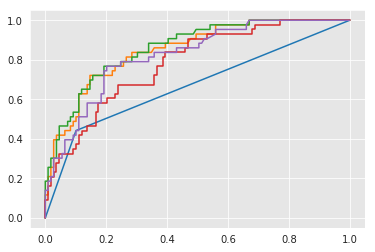

In [4]:
CLASSIFIERS=[DecisionTreeClassifier(max_depth=None, min_samples_split=2,
     random_state=0),
            RandomForestClassifier(n_estimators=1000, max_depth=None),
            ExtraTreesClassifier(n_estimators=1000, max_depth=None,
     min_samples_split=2),
            AdaBoostClassifier(n_estimators=1000),
            GradientBoostingClassifier(n_estimators=1000,max_depth=None)]

for clf in CLASSIFIERS:
    clf.fit(X_train,y_train)
    y_pred=clf.predict_proba(X_test)
    fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred[:,1], pos_label=1)
    auc=metrics.auc(fpr, tpr)
    print auc
    
    plt.plot(fpr,tpr)

    FPR=np.append(FPR,fpr)
    TPR=np.append(TPR,tpr)

In [5]:
# MERGE DECISIONS TO BOOST AUC

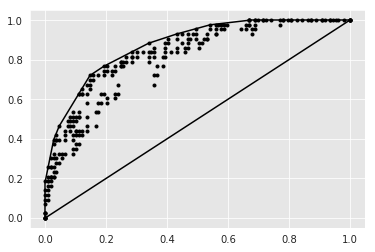

In [6]:
points=np.array([[a[0],a[1]] for a in zip(FPR,TPR)])
hull = ConvexHull(points)

plt.plot(points[:,0],points[:,1],'.k')
for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'k-')

In [7]:
x=np.argsort(points[hull.vertices,:][:,0])
auc=metrics.auc(points[hull.vertices,:][x,0],points[hull.vertices,:][x,1])
print auc

0.8764668231278002


In [8]:
max_depth=2
min_samples=2
minsplit=2
n_estimators=3
C=[DecisionTreeClassifier(max_depth=max_depth, min_samples_split=minsplit),
            RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth,min_samples_split=minsplit),
            ExtraTreesClassifier(n_estimators=n_estimators, max_depth=max_depth,min_samples_split=minsplit),
            AdaBoostClassifier(n_estimators=n_estimators),
            GradientBoostingClassifier(n_estimators=n_estimators,max_depth=max_depth),
            svm.SVC(kernel='rbf',gamma='scale',class_weight='balanced',probability=True)]

a=[1,3,5]
C=[C[i] for i in a]
print type(a)
b=2
print type(b)=='int'

<type 'list'>
False


In [9]:
def getAuc(X,y,test_size=0.25,max_depth=None,n_estimators=100,minsplit=4,FPR=[],TPR=[],VERBOSE=False, USE_ONLY=None):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    CLASSIFIERS=[DecisionTreeClassifier(max_depth=max_depth, min_samples_split=minsplit),
                RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth,min_samples_split=minsplit),
                ExtraTreesClassifier(n_estimators=n_estimators, max_depth=max_depth,min_samples_split=minsplit),
                AdaBoostClassifier(n_estimators=n_estimators),
                GradientBoostingClassifier(n_estimators=n_estimators,max_depth=max_depth),
                svm.SVC(kernel='rbf',gamma='scale',class_weight='balanced',probability=True)]

    if USE_ONLY is not None:
        if isinstance(USE_ONLY, (list,)):
            CLASSIFIERS=[CLASSIFIERS[i] for i in USE_ONLY]
        if isinstance(USE_ONLY, (int,)):
            CLASSIFIERS=CLASSIFIERS[USE_ONLY]

    for clf in CLASSIFIERS:
        clf.fit(X_train,y_train)
        y_pred=clf.predict_proba(X_test)
        fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred[:,1], pos_label=1)
        auc=metrics.auc(fpr, tpr)
        if VERBOSE:
            print auc

        #plt.plot(fpr,tpr)

        FPR=np.append(FPR,fpr)
        TPR=np.append(TPR,tpr)
    points=np.array([[a[0],a[1]] for a in zip(FPR,TPR)])
    hull = ConvexHull(points)
    x=np.argsort(points[hull.vertices,:][:,0])
    auc=metrics.auc(points[hull.vertices,:][x,0],points[hull.vertices,:][x,1])
    return auc,CLASSIFIERS

In [10]:
from tqdm import tqdm
P=[]
for i in tqdm(range(100)):
    P=np.append(P,getAuc(X,y,minsplit=2,max_depth=2))

  7%|▋         | 7/100 [00:04<01:05,  1.43it/s]


KeyboardInterrupt: 

In [24]:
PP=np.array(P[::2]).astype(float)
PP

array([0.89153439, 0.93070788, 0.92038462, 0.88528139, 0.93855219,
       0.84386973, 0.90785256, 0.90313725, 0.94093519, 0.91005291,
       0.93229167, 0.90428714, 0.89182453, 0.92214664, 0.92871386,
       0.83333333, 0.82352941, 0.8766835 , 0.94044321, 0.92663243,
       0.89642857, 0.94230769, 0.91354167, 0.88285145, 0.95610119,
       0.90848214, 0.96168052, 0.8802297 , 0.89983974, 0.86236559,
       0.87748918, 0.86120219, 0.88306011, 0.91263331, 0.90086207,
       0.86300246, 0.91226321, 0.91145833, 0.82457386, 0.88797814,
       0.84099617, 0.90401786, 0.91532258, 0.93692308, 0.83896104,
       0.81691919, 0.91974078, 0.87735849, 0.91540404, 0.96363636,
       0.86842105, 0.93176471, 0.9392945 , 0.82514881, 0.86218212,
       0.95960784, 0.85488506, 0.87455357, 0.93463203, 0.91582492,
       0.89400922, 0.89419643, 0.89644747, 0.88787879, 0.95365053,
       0.85274815, 0.89183502, 0.9537037 , 0.84301347, 0.94632035,
       0.84112554, 0.92151431, 0.84946678, 0.91490196, 0.95796

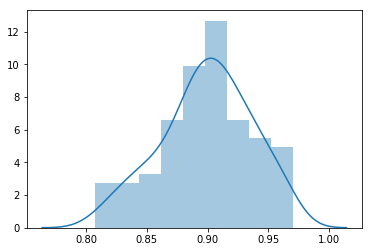

In [25]:
sns.distplot(PP)

In [11]:
P1=[]
for i in tqdm(range(1000)):
    P1=np.append(P1,getAuc(X,y,minsplit=2,max_depth=2,n_estimators=3,USE_ONLY=[2]))
    

100%|██████████| 1000/1000 [00:06<00:00, 158.60it/s]


0.8592307692307692


/home/ishanu/.local/lib/python2.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


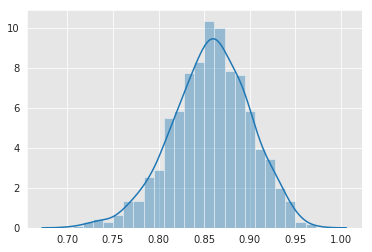

In [12]:
sns.distplot(np.array(P1[::2]).astype(float))
print np.median(np.array(P1[::2]).astype(float))

In [107]:
P1[1]

[ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=3, n_jobs=None,
            oob_score=False, random_state=None, verbose=0, warm_start=False)]

In [116]:
P1[1::2][0]

[ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=3, n_jobs=None,
            oob_score=False, random_state=None, verbose=0, warm_start=False)]

In [120]:
FI=[]
for model in P1[1::2]:
#model=P1[3][0]
    fi=model[0].feature_importances_
    FI=np.append(FI,np.nonzero(fi))
len(np.array(list(set(FI))).astype(int))

160

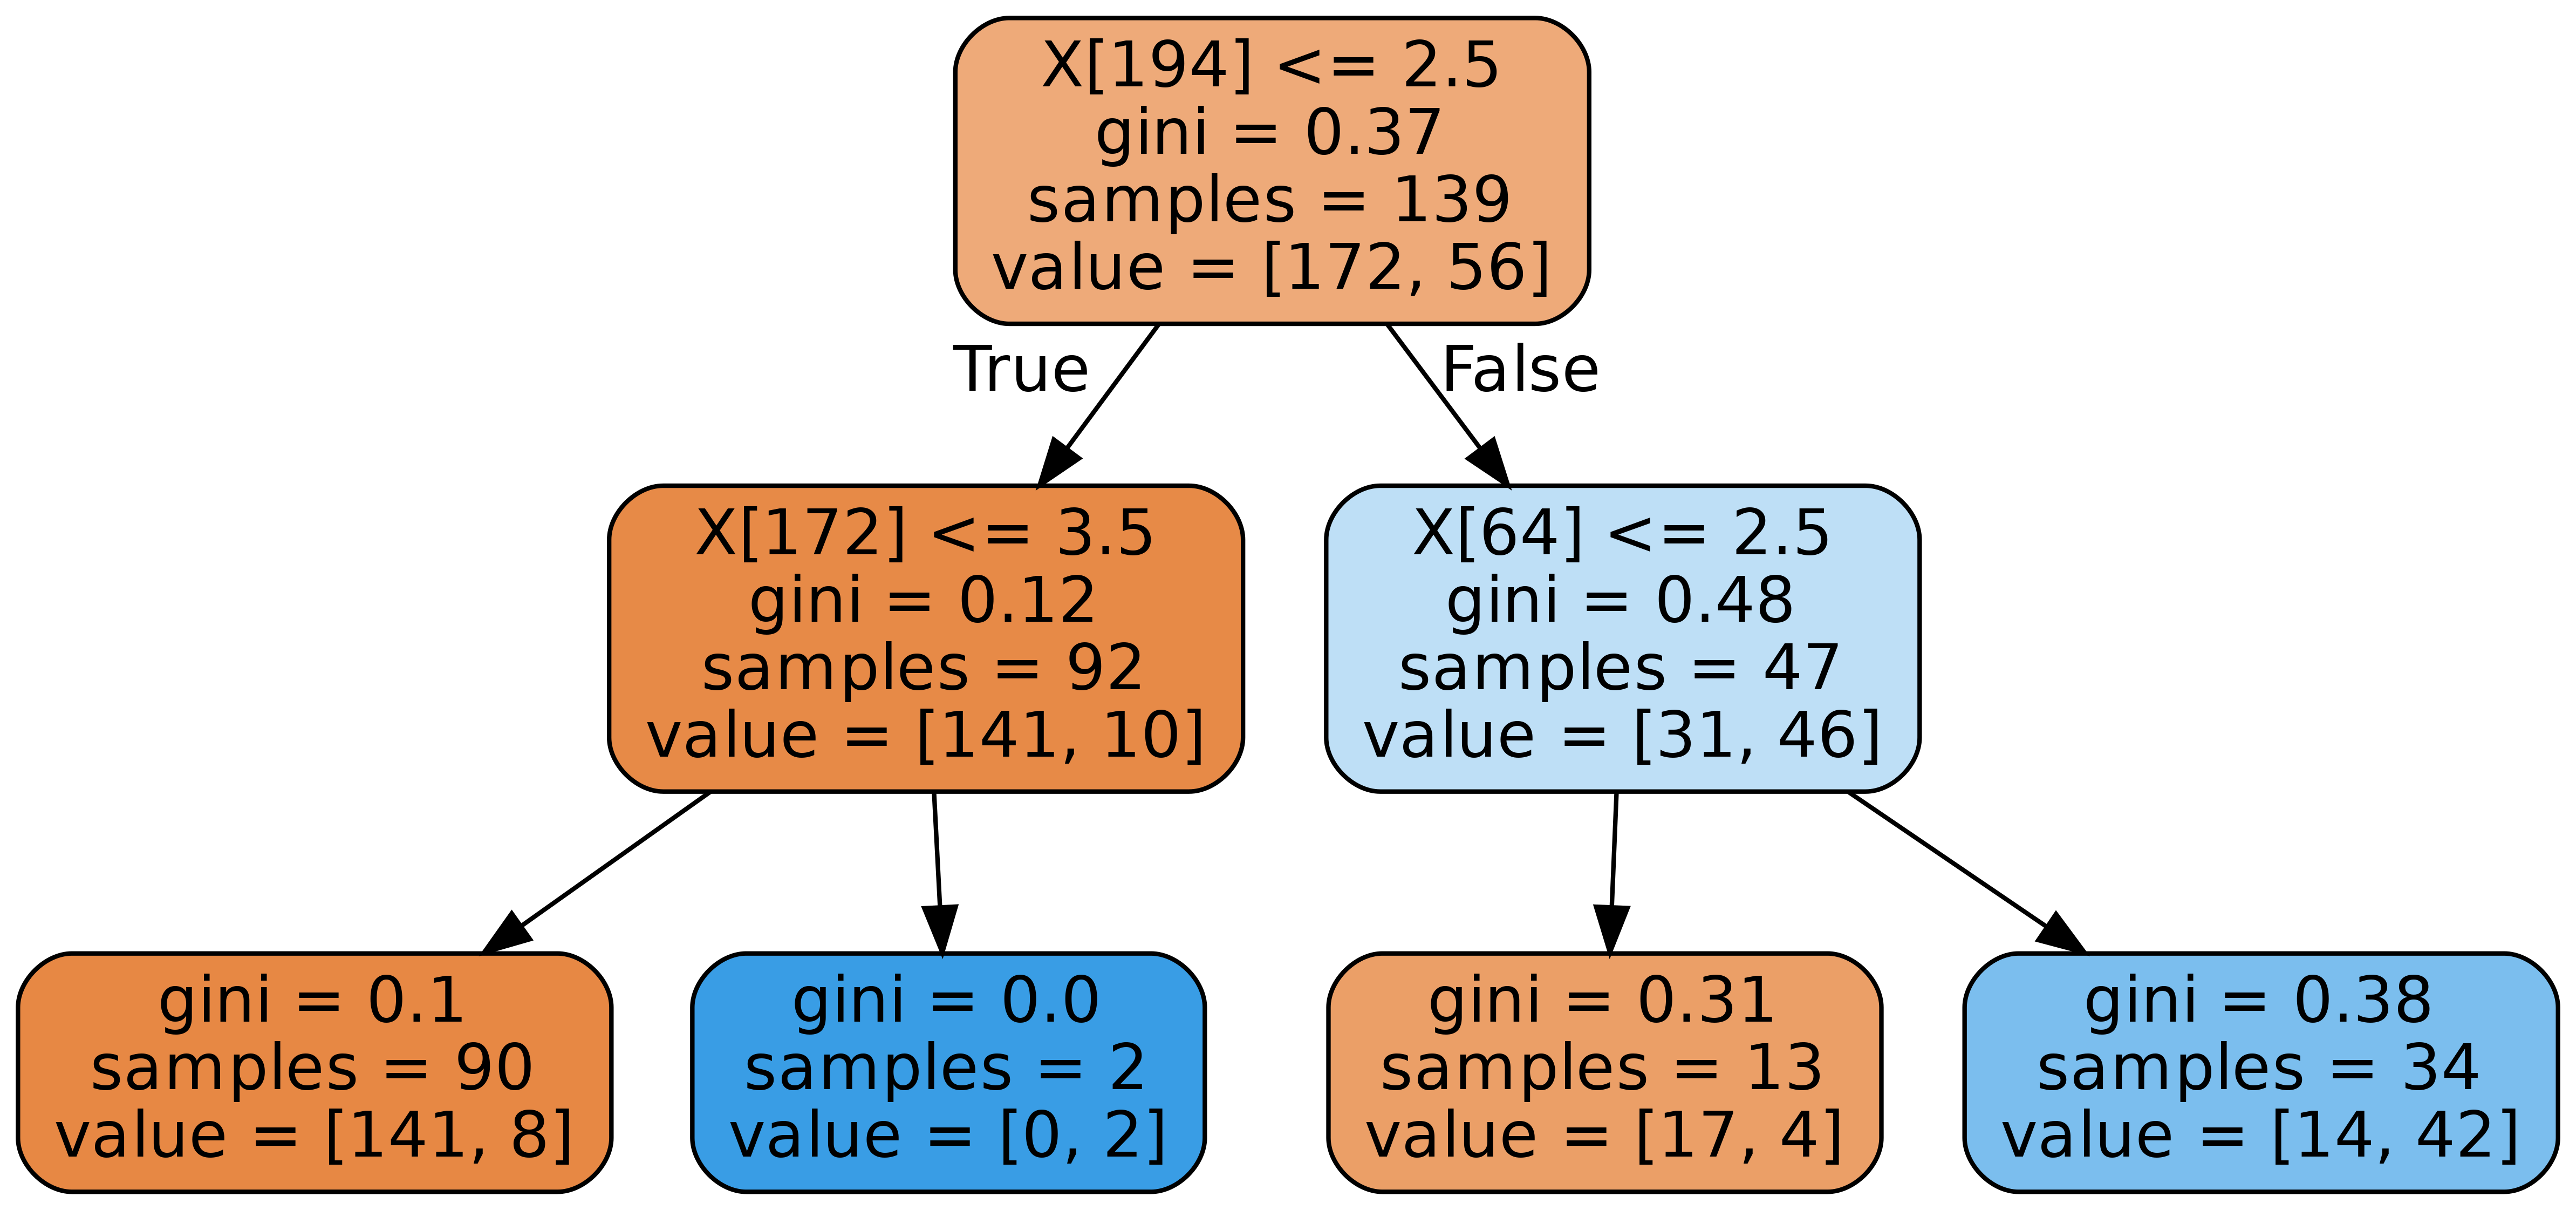

In [92]:
model=P1[1][0]

count=2
estimator = model.estimators_[count]


from sklearn.tree import export_graphviz
export_graphviz(estimator, out_file='tree.dot', 
                #feature_names = iris.feature_names,
                #class_names = iris.target_names,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree'+str(count)+'.png', '-Gdpi=600'])
from IPython.display import Image
Image(filename = 'tree'+str(count)+'.png')

In [94]:
[auc0,clf]=getAuc(X,y,minsplit=2,max_depth=10,n_estimators=100,VERBOSE=False,USE_ONLY=[5])

In [95]:
auc0

0.9501385041551247

In [96]:
clf[0].n_support_ 

array([103,  61], dtype=int32)